# Polynomial Regression and Multiple Linear Regression

if the graph is other than straight i.e cury all we cannot fit the linear line there will be more error and so 
y = mx + c is not possible <br>

instead we can use polynomial i.e quadratic equations y = ax<sup>2</sup>+bx+c    or cubic and more <br> 
degree is highest power of x <br> 

critical point is a point in graph where the tangent value changes i.e from 1 or -1 to 0 <br> 
if degree = 2 then there is 1 critical point <br>
if degree = 3 then critical point = 2 <br>

will be using Funtional approach 

## Function approximation with a polynomial model 

y = f(x) = sin x <br>
approximation this function with a polynomial funtion of the form <br>
y = w<sub>0</sub> + w<sub>1</sub>x + w<sub>2</sub>x<sup>2</sup>   in range x belongs to (0,2 pi) <br>

<a href="https://academy.learnwik.in/courses/machine-learning-with-python/lessons/17-polynomial-regression-and-multiple-linear-regression-from-scratch-and-with-sklearn/">Link to the notebook</a>

linear regression -> w<sub>1</sub>x + w<sub>0</sub>

multiple linear regression -> w<sub>3</sub>x + w<sub>2</sub>x + w<sub>1</sub>x + w<sub>0</sub> 

polynomial regression -> w<sub>2</sub>x<sup>2</sup> + w<sub>1</sub>x + w<sub>0</sub>

# Regression with Sklearn module 

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('FuelConsumption.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [46]:
df.dropna(axis=0,inplace=True)

In [47]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [49]:
df.MODELYEAR.unique()

array([2014])

In [50]:
df.CYLINDERS.unique()

array([ 4,  6, 12,  8, 10,  3,  5])

In [51]:
df.ENGINESIZE.unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2, 6. ,
       6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 1.8, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4])

In [52]:
# here after checking for unique for all column the MODELYEAR has only one value
# so drop that column

df.drop("MODELYEAR",axis=1,inplace=True)

In [53]:
df

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MAKE                      1067 non-null   object 
 1   MODEL                     1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 100.2+ KB


In [55]:
# convert all some type to integer type or float type 

df["ENGINESIZE"] = df["ENGINESIZE"].apply(pd.to_numeric)

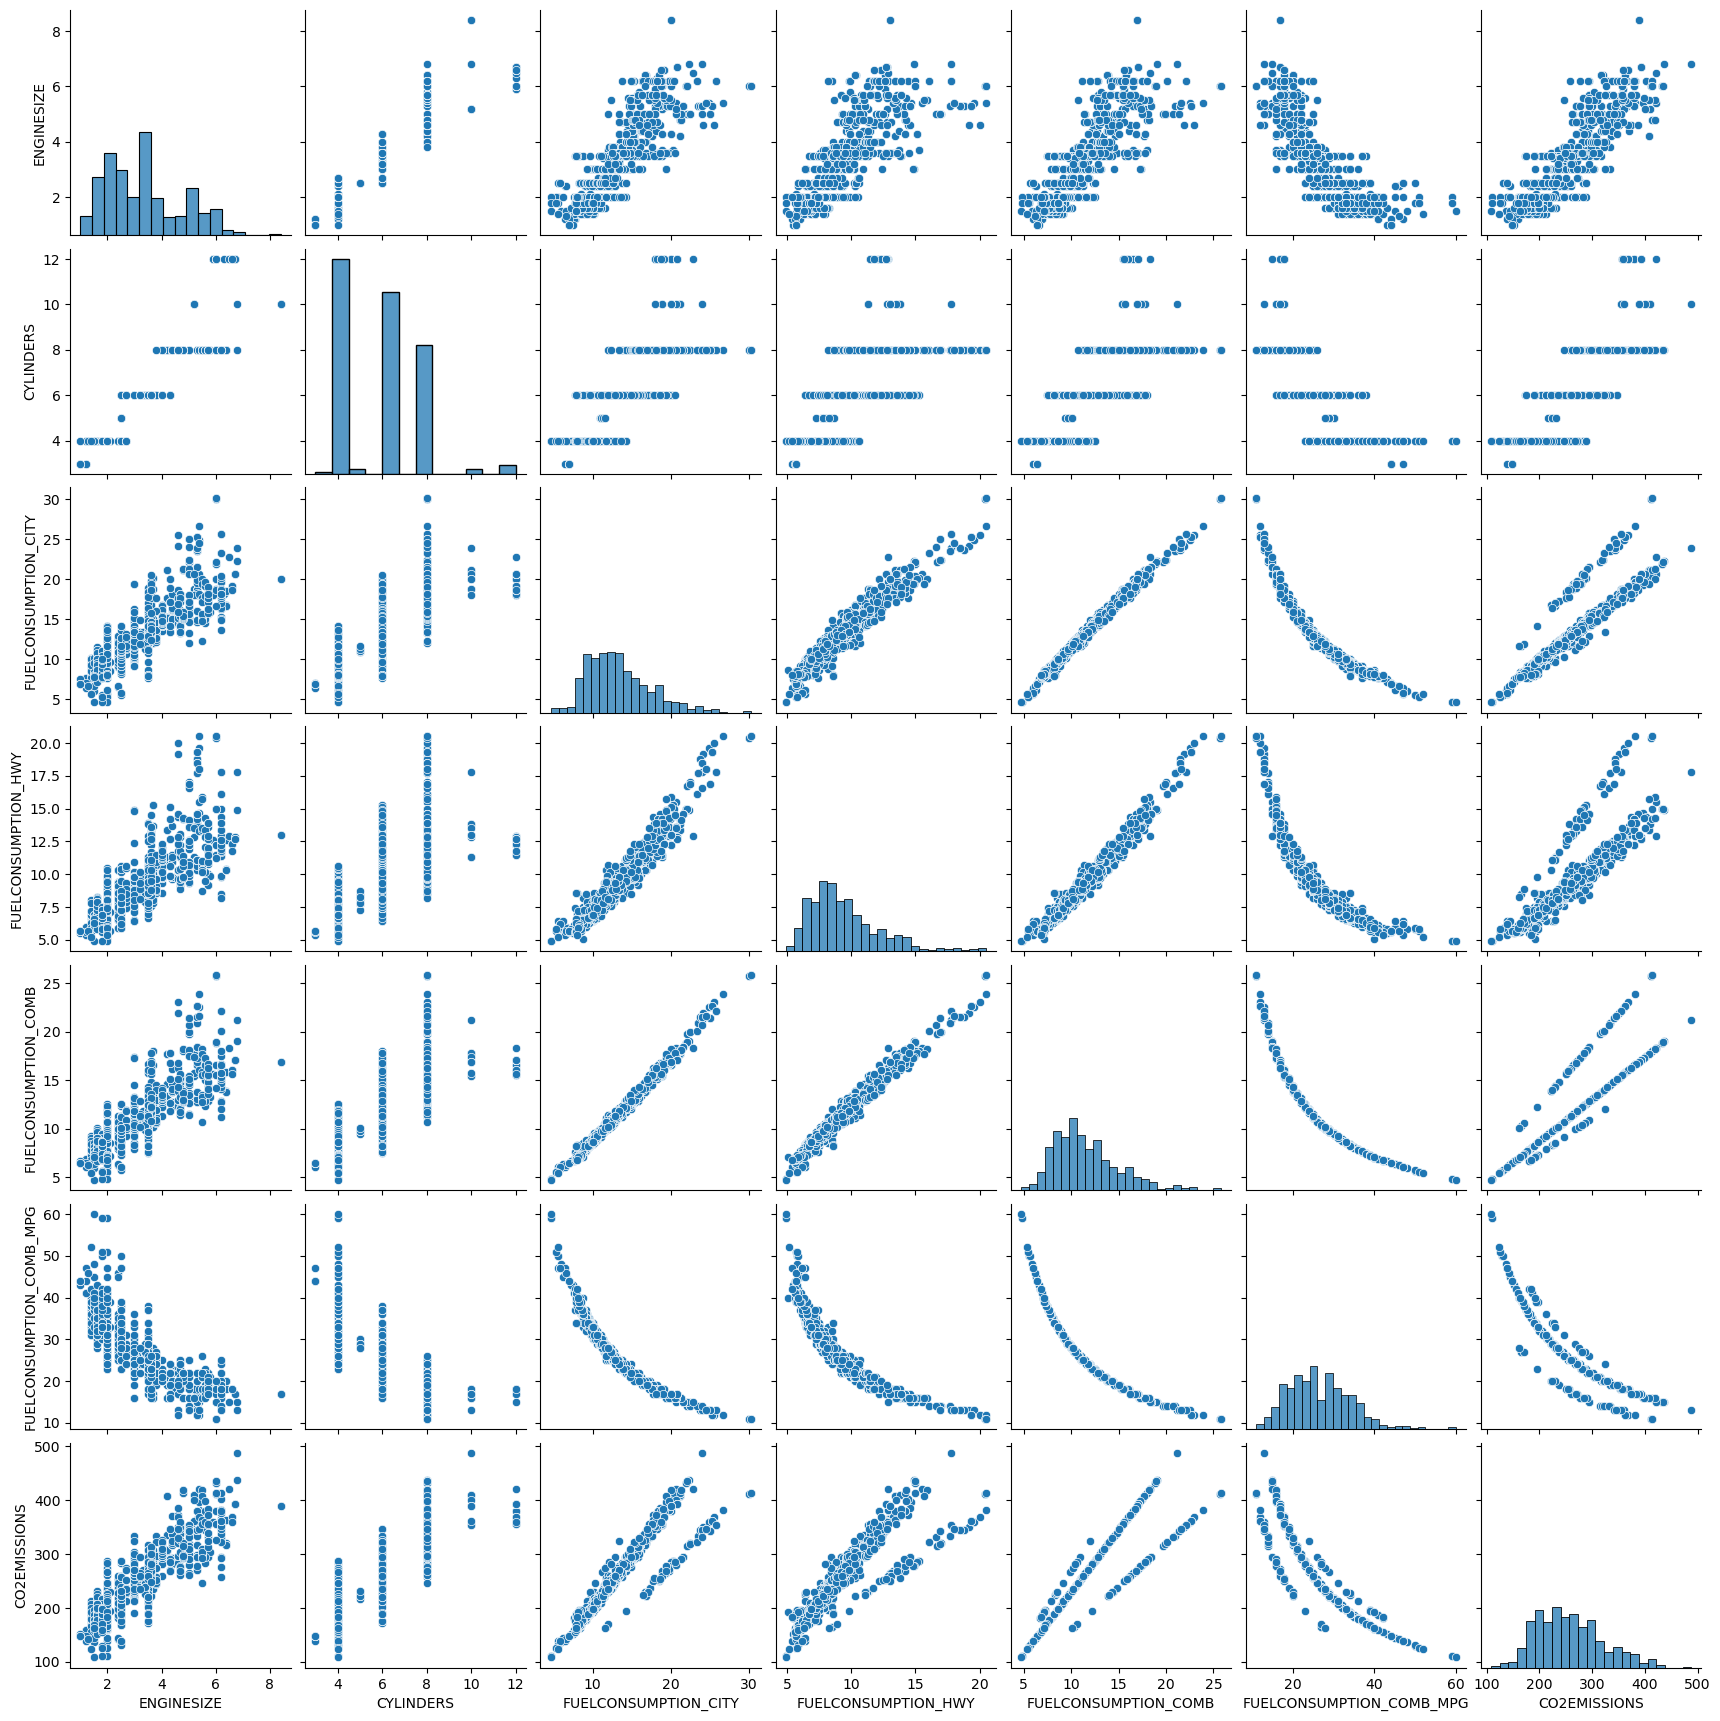

In [56]:
sns.pairplot(df)

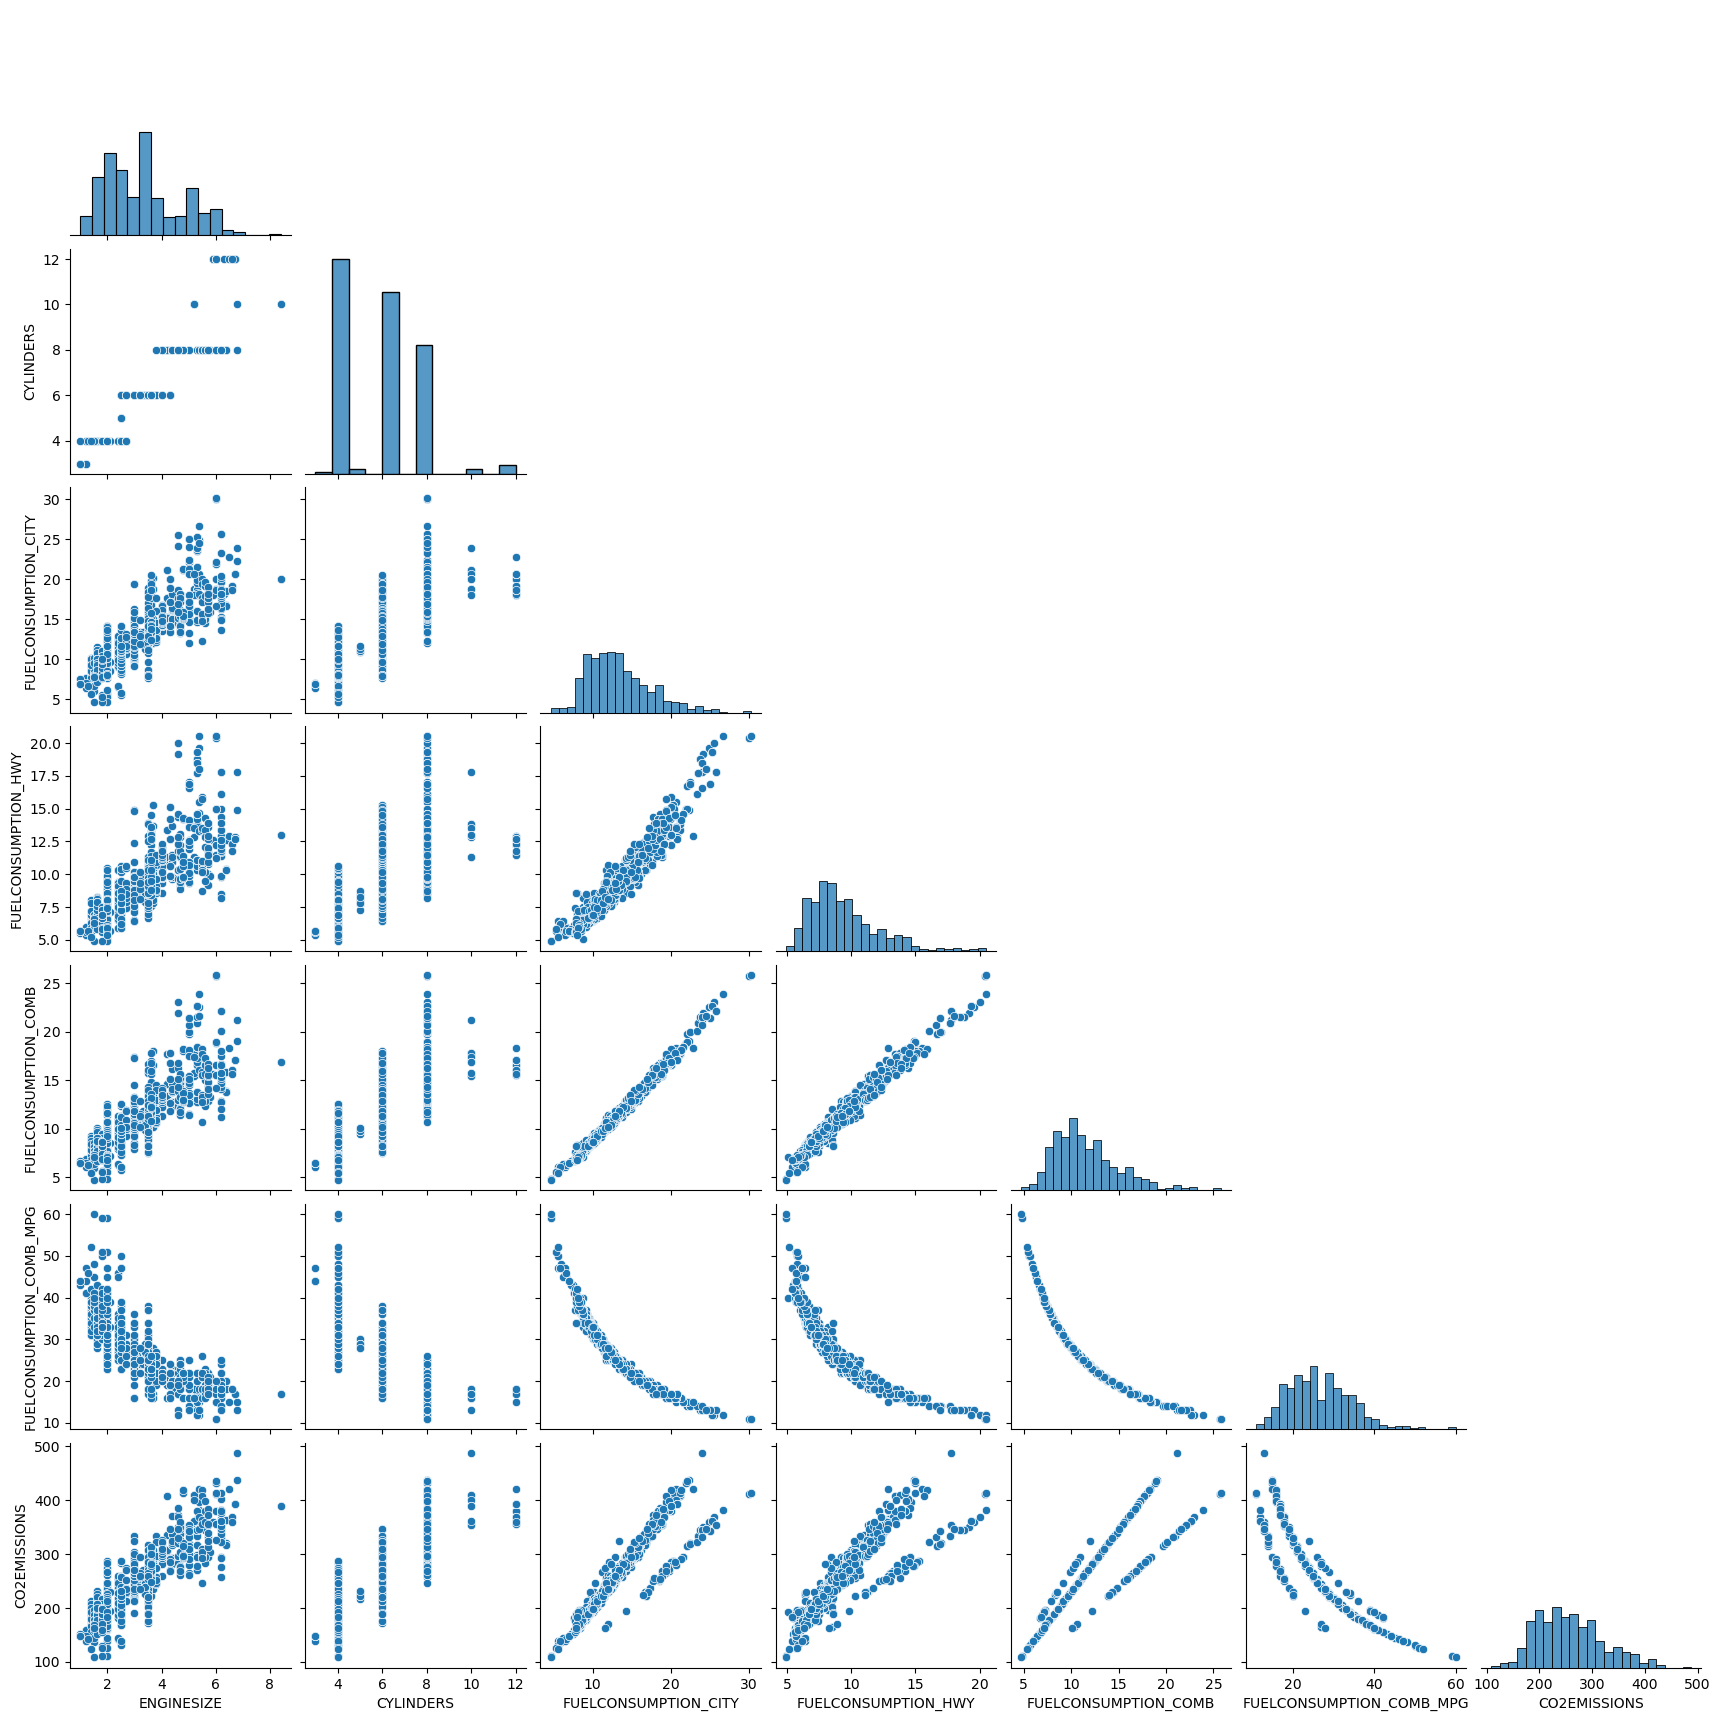

In [57]:
sns.pairplot(df,corner=True)

In [58]:
df.corr()

/tmp/ipykernel_24791/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [59]:
# linear regression with one input so when in sklearn using this as 1d we must reshape it to 2d.
# because we must use more than 1 i.e 2d array or more 
x = df["FUELCONSUMPTION_COMB"]
y = df["CO2EMISSIONS"]
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)   # Expected 2D array, got 1D array instead:

ValueError: Expected 2D array, got 1D array instead:
array=[ 8.5  9.6  5.9 ... 11.8 11.3 12.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [60]:
np.array(x)

array([ 8.5,  9.6,  5.9, ..., 11.8, 11.3, 12.8])

In [61]:
x = np.array(x).reshape(-1,1)
lr.fit(x,y)

LinearRegression()

In [62]:
x

array([[ 8.5],
       [ 9.6],
       [ 5.9],
       ...,
       [11.8],
       [11.3],
       [12.8]])

In [63]:
y_pred = lr.predict(x)

In [64]:
lr.intercept_

68.38713348317265

In [65]:
lr.coef_

array([16.21997027])

In [67]:
y_pred

array([206.25688074, 224.09884803, 164.08495805, ..., 259.78278261,
       251.67279748, 276.00275288])

In [69]:
np.array(y)

array([196, 221, 136, ..., 271, 260, 294])

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mean_absolute_error(y,y_pred)

20.36096654815624

In [72]:
mean_squared_error(y,y_pred)       # actual , predicted

818.9337617545483

In [75]:
r2_score(y,y_pred)

0.7958934270115507

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MAKE                      1067 non-null   object 
 1   MODEL                     1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 100.2+ KB


In [79]:
# multiple values 

x = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG"]]
y = df["CO2EMISSIONS"]

In [80]:
lr2 = LinearRegression()

lr2.fit(x,y)

LinearRegression()

In [81]:
lr2.intercept_

253.53120114591712

In [82]:
lr2.coef_

array([  8.57767262,   7.698747  , -10.59262337,  -3.48918281,
        17.75286099,  -3.86924281])

In [83]:
y_pred = lr2.predict(x)

In [84]:
mean_absolute_error(y,y_pred)

13.908941344647333

In [85]:
mean_squared_error(y,y_pred)

444.21569423856056

In [86]:
r2_score(y,y_pred)

0.8892861092642407

## Polynomial regression

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

In [89]:
poly_x = poly.fit_transform(x)
poly_x

array([[1.0000e+00, 2.0000e+00, 4.0000e+00, ..., 7.2250e+01, 2.8050e+02,
        1.0890e+03],
       [1.0000e+00, 2.4000e+00, 4.0000e+00, ..., 9.2160e+01, 2.7840e+02,
        8.4100e+02],
       [1.0000e+00, 1.5000e+00, 4.0000e+00, ..., 3.4810e+01, 2.8320e+02,
        2.3040e+03],
       ...,
       [1.0000e+00, 3.0000e+00, 6.0000e+00, ..., 1.3924e+02, 2.8320e+02,
        5.7600e+02],
       [1.0000e+00, 3.2000e+00, 6.0000e+00, ..., 1.2769e+02, 2.8250e+02,
        6.2500e+02],
       [1.0000e+00, 3.2000e+00, 6.0000e+00, ..., 1.6384e+02, 2.8160e+02,
        4.8400e+02]])

## ... continue video